<a href="https://colab.research.google.com/github/vvctort1/Data-Analysis1---Horror-movies/blob/main/horrorMovieDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Checkpoint 4 - Data Science - Software Engineering

### Turma 2ESPF

### Alunos:

- Murilo Marsola Eloys (rm552117)
- Victor Kenzo Toma (rm551649)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
 # Dataframe do csv
horror_df = pd.read_csv("./sample_data/horror_movies.csv")

# Filtrando o DataSet
### Foi criado o "df_filtrado", já que o DataSet possui diversos dados que não serão úteis para as nossas análises, sem contar de dados com valor zerados em colunas onde não poderiam, como no "runtime", que é o tempo do filme.

In [ ]:
# Simplificando o dataframe
horror_df2 = horror_df[["id","title","release_date","popularity","budget", "revenue", "runtime", "genre_names"]]

# Retiramos todos os registros que estavam com as colunas: budget, revenue e runtime zeradas.
df_filtrado = horror_df2[(horror_df2 != 0).all(axis=1)]

df_filtrado

,id,title,release_date,popularity,budget,revenue,runtime,genre_names
2,882598,Smile,2022-09-23,1863.628,17000000,45000000,115,"Horror, Mystery, Thriller"
3,756999,The Black Phone,2022-06-22,1071.398,18800000,161000000,103,"Horror, Thriller"
6,717728,Jeepers Creepers: Reborn,2022-09-15,821.605,20000000,2892594,88,"Horror, Mystery, Thriller"
7,762504,Nope,2022-07-20,733.112,68000000,170800000,130,"Horror, Mystery, Science Fiction, Thriller"
9,760104,X,2022-03-17,543.670,10000000,14257609,106,"Horror, Mystery, Thriller"
...,...,...,...,...,...,...,...,...
31902,985611,Cycle,2021-04-18,0.600,10,10,3,"Drama, Horror, Thriller"
31955,988476,Willowpede,2020-01-03,0.600,5000,500,11,Horror
32382,1020263,I,2021-09-09,0.600,1,2,1,"Horror, Mystery"
32383,1020264,II,2021-09-09,0.600,1,2,2,"Horror, Mystery"


<h1>Como a popularidade dos filmes de torror evoluiu ao longo das décadas? Existem padrões sazonais ou anos específicos em que os filmes de terror tendem a ser mais populares?</h1>

###(Anos X Popularidade)

###Para responder à essa pergunta vamos dividir em uma tabela, filmes dos anos entre 2003 a 2013, e outra tabela com filmes dos anos de 2013 a 2023.

###Após, fizemos a somatória dos valores da coluna de popularidade de cada uma das tabelas e chegamos aos resultados:

- tabela 1 (2003-2013): 7755.15
- tabela 2 (2013-2023): 16498.68




In [ ]:
# Filmes de 2003 a 2013
HorrorMovieDecada0 = df_filtrado[(df_filtrado['release_date'] >= '2003-01-01') & (df_filtrado['release_date'] < '2013-01-01')]
# Filmes de 2013 a 2023
HorrorMovieDecada1 = df_filtrado[(df_filtrado['release_date'] >= '2013-01-01') & (df_filtrado['release_date'] <= '2023-01-01')]

# Soma dos valores da coluna popularidade dos filmes de 2003 a 2013
decada1 = HorrorMovieDecada0['popularity'].sum()

# Somando valores da coluna de popularidade dos filmes de 2013 a 2023
decada2 = HorrorMovieDecada1['popularity'].sum()

print(f'''
Popularidade dos Filmes

Década de 2003 a 2013: {decada1:.2f}
Década de 2013 a 2023: {decada2:.2f}
''')


Popularidade dos Filmes

Década de 2003 a 2013: 7755.15
Década de 2013 a 2023: 16490.68



Agora, vamos plotar um gráfico para conseguirmos vizualizar a média de popularidade no decorrer dos anos

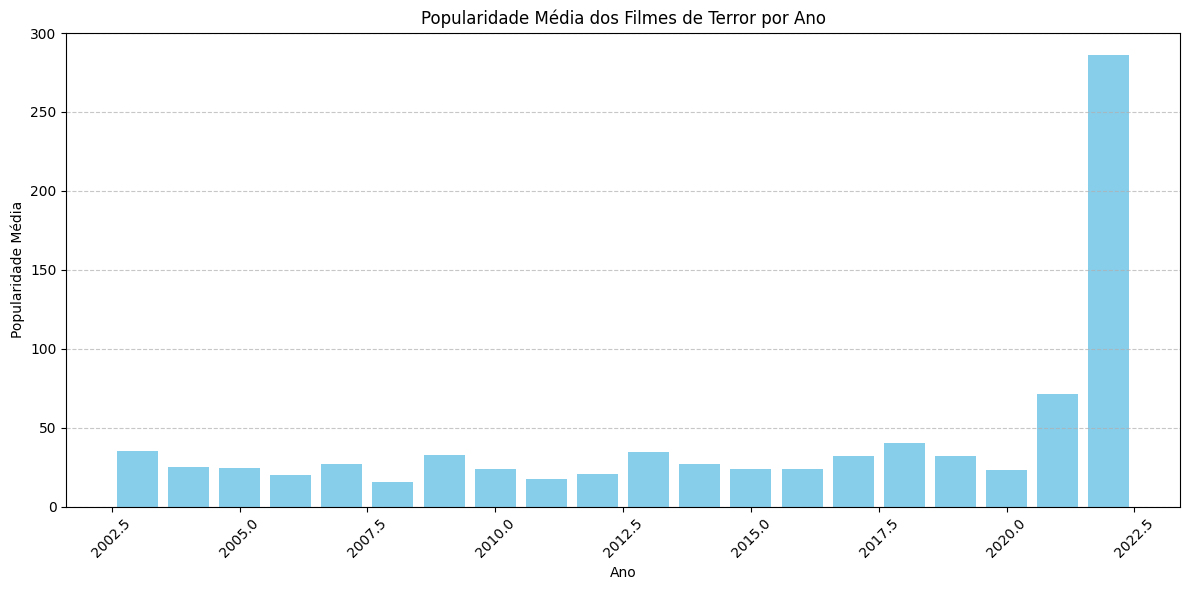

In [25]:

# Converter a coluna 'release_date' para datetime
df_filtrado['release_date'] = pd.to_datetime(df_filtrado['release_date'], errors='coerce')

# Extrair o ano da coluna 'release_date'
df_filtrado.loc[:,'year'] = df_filtrado['release_date'].dt.year

# Filtrar anos válidos (a partir de 2003)
df_filtrado = df_filtrado[df_filtrado['year'] >= 2003]

# Agrupar por ano e calcular a média da popularidade
popularity_by_year = df_filtrado.groupby('year')['popularity'].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(popularity_by_year['year'], popularity_by_year['popularity'], color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Popularidade Média')
plt.title('Popularidade Média dos Filmes de Terror por Ano')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Após verificar a diferença entre a popularidade das duas décadas passadas, podemos notar que a popularidade mais que dobrou na última década em comparação com anos anteriores. Ao analisar o gráfico, notamos que o principal impulsionador dessa popularidade na década de 2013 a 2023, foram os anos à partir de 2020. Daí surge a hipótese da probabilidade da influência da pandemia do coronavírus em relação à popularidade de filmes de terror. Podendo ter sido alavancada devido às redes sociais e maior tempo que as pessoas passaram consumindo entretenimentos virtuais.

<h1>Existe relação entre o tempo de duração dos filmes e um ROI maior?</h1>

###(Duração X Retorno do investimento)


Para responder a essa pergunta, primeiramente criaremos uma coluna 'profit' que vai conter: o valor arrecadado em bilheteria subtraído pelo valor gasto para produção, o ROI positivo ou negativo de cada filme.


<p>À partir deste dataframe, verificamos que a proporção entre <b>filmes com duração superior ou igual a 100 minutos</b> com <b>filmes com duração inferior a 100 minutos</b> é de 0.55:</p>

- Maior ou igual a 100 minutos: 234 filmes (55.19%)
- Menor que 100 minutos: 424 filmes (44.81%)

<h3>Filmes que lucraram</h3>

- Maior ou igual a 100 minutos: 163 filmes (63.42%)
- Menor que 100 minutos: 257 filmes (36.58%)

<h3>Filmes com lucro igual a zero ou que tiveram prejuízo</h3>


- Maior ou igual a 100 minutos: 71 filmes (42.51%)
- Menor que 100 minutos: 167 filmes (57.49%)

In [24]:
df_filtrado.loc[:, 'profit'] = df_filtrado['revenue'] - df_filtrado['budget']

# Todos os filmes
df_filtrado_runtime_maior = df_filtrado[(df_filtrado['runtime'] >= 100)]
df_filtrado_runtime_menor = df_filtrado[(df_filtrado['runtime'] < 100)]

# Filmes que lucraram
df_lucro_runtime_maior = df_filtrado[(df_filtrado['profit'] > 0) & (df_filtrado['runtime'] >= 100)]
df_lucro_runtime_menor = df_filtrado[(df_filtrado['profit'] > 0) & (df_filtrado['runtime'] < 100)]

# Filmes que tiveram prejuízo financeiro
df_prejuizo_runtime_maior = df_filtrado[(df_filtrado['profit'] <= 0) & (df_filtrado['runtime'] >= 100)]
df_prejuizo_runtime_menor = df_filtrado[(df_filtrado['profit'] <= 0) & (df_filtrado['runtime'] < 100)]

print(f'''
Filmes totais

>= 100 min: {len(df_filtrado_runtime_maior)}
< 100 min: {len(df_filtrado_runtime_menor)}
proporção maior x menor = {np.divide(len(df_filtrado_runtime_maior),len(df_filtrado_runtime_menor)):.2f}


Filmes que Lucraram

>= 100 min: {len(df_lucro_runtime_maior)}
< 100 min: {len(df_lucro_runtime_menor)}
proporção maior x menor = {np.divide(len(df_lucro_runtime_maior),len(df_lucro_runtime_menor)):.2f}


Filmes que ficaram no prejuízo

>= 100 min: {len(df_prejuizo_runtime_maior)}
< 100 min: {len(df_prejuizo_runtime_menor)}
proporção maior x menor = {np.divide(len(df_prejuizo_runtime_maior),len(df_prejuizo_runtime_menor)):.2f}

''')


Filmes totais

>= 100 min: 234
< 100 min: 424
proporção maior x menor = 0.55


Filmes que Lucraram

>= 100 min: 163
< 100 min: 257
proporção maior x menor = 0.63


Filmes que ficaram no prejuízo

>= 100 min: 71
< 100 min: 167
proporção maior x menor = 0.43




Fazendo uma análise, podemos notar que a taxa de sucesso de filmes com durações mais elevadas foi maior. Em contrapartida a taxa de sucesso de filmes com durações menores foi menor. Concluindo pelos dados, que filmes que possuem maior tempo de duração normalmente tem mais probabilidade de obter lucros.

<h1>Será que filmes com orçamentos maiores são mais populares? Ou será que a popularidade dos filmes depende mais de outros fatores?</h1>

###(Orçamento X Popularidade)



Para descobrir, usamos uma técnica chamada regressão linear. É como traçar uma linha num gráfico que tenta representar a relação entre duas coisas: no nosso caso, orçamento e popularidade.

O que descobrimos?

Infelizmente, nossa análise mostrou que o orçamento não parece ter muita influência na popularidade de um filme de terror.

- A linha que traçamos ficou quase reta, mostrando que mesmo aumentando o orçamento, a popularidade não muda muito.
- Na verdade, apenas 2% da popularidade de um filme parece estar ligada ao dinheiro gasto nele.

O sucesso de um filme de terror parece depender de uma combinação de fatores complexos que vão além do investimento financeiro.

Mean Squared Error: 6257.60
R-squared: 0.02
Coeficiente angular (slope): 0.00
Coeficiente linear (intercept): 26.29


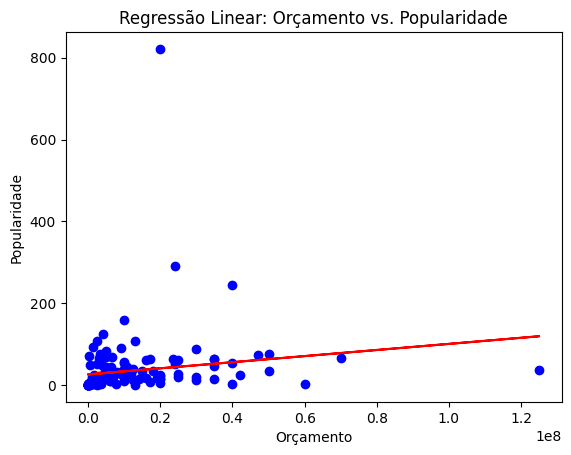

In [ ]:

df_filtrado = df_filtrado.dropna(subset=['budget', 'popularity'])

X = df_filtrado[['budget']]
y = df_filtrado['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Erro médio do modlo
mse = mean_squared_error(y_test, y_pred)

# Qualidade do ajuste do modelo
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Inclinação da reta
print(f"Coeficiente angular (slope): {model.coef_[0]:.2f}")

# Intercepto da reta com o eixo y
print(f"Coeficiente linear (intercept): {model.intercept_:.2f}")

plt.scatter(X_test, y_test, color='blue')

# Plotar a linha de regressão
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Orçamento')
plt.ylabel('Popularidade')
plt.title('Regressão Linear: Orçamento vs. Popularidade')

plt.show()


# Para as próximas análises, separaremos os top 100 filmes mais populares
### (O próprio "csv" está ordenado por popularidade)

In [ ]:
top100_mais_populares_df = df_filtrado.head(100).reset_index(drop=True)

top100_mais_populares_df

,id,title,release_date,popularity,budget,revenue,runtime,genre_names,year,profit
0,882598,Smile,2022-09-23,1863.628,17000000,45000000,115,"Horror, Mystery, Thriller",2022,28000000
1,756999,The Black Phone,2022-06-22,1071.398,18800000,161000000,103,"Horror, Thriller",2022,142200000
2,717728,Jeepers Creepers: Reborn,2022-09-15,821.605,20000000,2892594,88,"Horror, Mystery, Thriller",2022,-17107406
3,762504,Nope,2022-07-20,733.112,68000000,170800000,130,"Horror, Mystery, Science Fiction, Thriller",2022,102800000
4,760104,X,2022-03-17,543.670,10000000,14257609,106,"Horror, Mystery, Thriller",2022,4257609
...,...,...,...,...,...,...,...,...,...,...
95,14001,Dead Silence,2007-03-16,59.495,20000000,22217407,89,Horror,2007,2217407
96,214,Saw III,2006-10-27,59.343,10000000,164874275,114,"Crime, Horror, Thriller",2006,154874275
97,530385,Midsommar,2019-07-03,58.670,9000000,47980982,147,"Drama, Horror, Mystery",2019,38980982
98,338967,Zombieland: Double Tap,2019-10-09,58.248,42000000,122801777,99,"Comedy, Horror",2019,80801777


# Até que ponto podemos concluir que técnicas de maximização do lucro estão diretamente relacionadas ao aumento do orçamento? Ou existem outros elementos qualitativos que influenciam o sucesso de filmes financiados com menos dinheiro?

###(Orçamento X Lucro)

### Embora a correlação entre orçamento e lucro seja positiva, um maior orçamento não garante um maior lucro. Filmes de baixo orçamento podem ser lucrativos com criatividade, marketing viral e segmentação de nichos. A combinação de criatividade, execução e público-alvo é mais importante do que o orçamento.

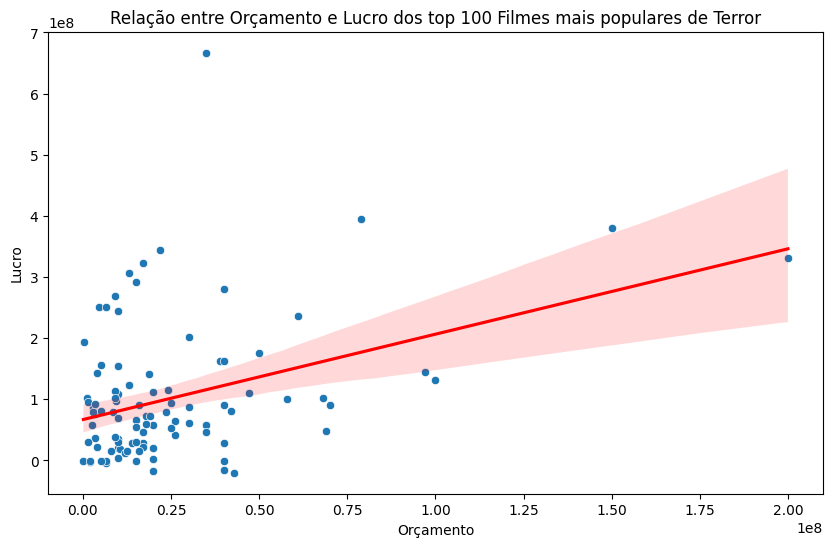

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='profit', data=top100_mais_populares_df)
sns.regplot(x='budget', y='profit', data=top100_mais_populares_df, scatter=False, color='red')
plt.title('Relação entre Orçamento e Lucro dos top 100 Filmes mais populares de Terror')
plt.xlabel('Orçamento')
plt.ylabel('Lucro')
plt.show()

# Qual a relação entre popularidade e sucesso financeiro no cinema? Como a popularidade influencia os lucros?

###(Popularidade X Lucros)

### O gráfico demonstra que popularidade e lucro nem sempre estão diretamente conectados em filmes. Mesmo sendo populares, alguns filmes têm baixos ganhos, sugerindo que outros fatores impactam o sucesso financeiro. Isso levanta questões sobre a confiabilidade da popularidade como indicador de retorno financeiro.

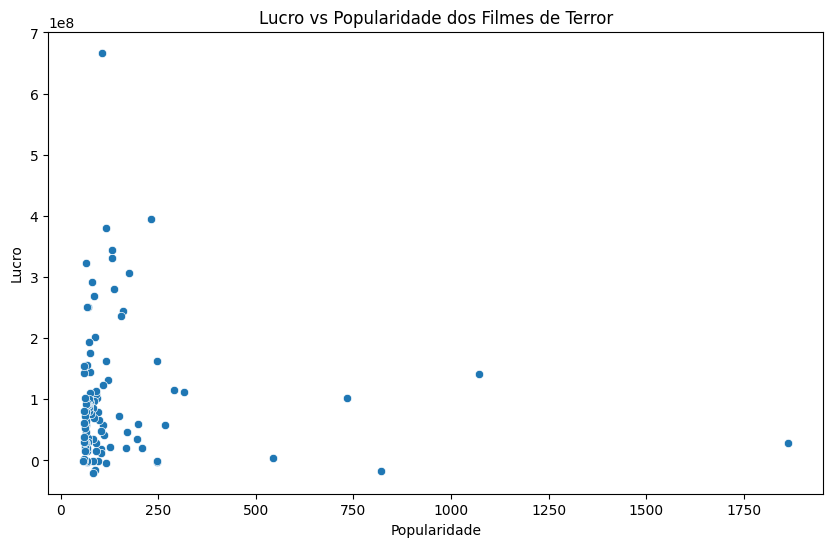

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='profit', data=top100_mais_populares_df)
plt.title('Lucro vs Popularidade dos Filmes de Terror')
plt.xlabel('Popularidade')
plt.ylabel('Lucro')
plt.show()

#Considerando que os filmes com popularidade "Alta" e "Média-Alta" têm maior variabilidade nos lucros, até que ponto essa variabilidade reflete nas campanhas de marketing ou estratégias de lançamento, e o que isso nos diz sobre os riscos associados à busca de popularidade em detrimento da estabilidade financeira?

### O boxplot mostra que filmes mais populares geralmente ganham mais dinheiro, mas também têm retornos mais variáveis devido a altos custos de marketing e expectativas inflacionadas. Por outro lado, filmes menos populares podem ter lucros modestos, mas com maior previsibilidade financeira. Essa análise destaca os riscos e recompensas associados à busca por popularidade na indústria cinematográfica.

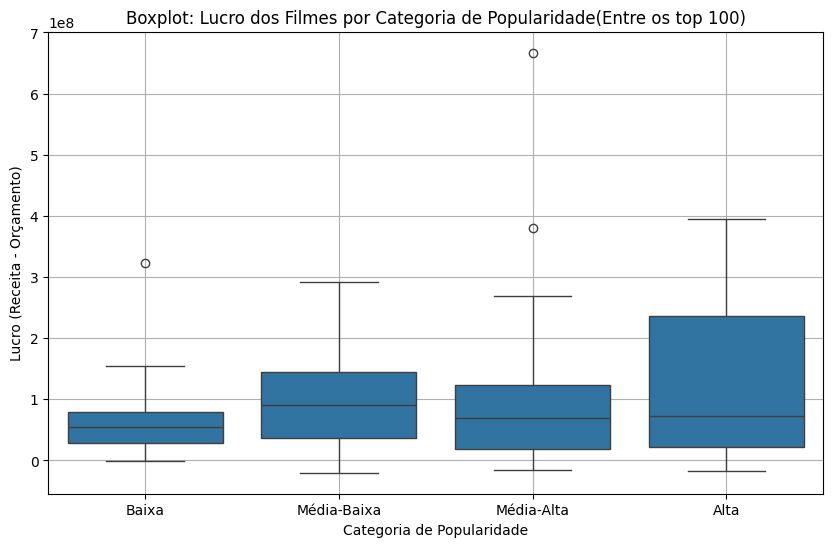

In [ ]:
top100_mais_populares_df['popularity_category'] = pd.qcut(top100_mais_populares_df['popularity'], q=4, labels=['Baixa', 'Média-Baixa', 'Média-Alta', 'Alta'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='popularity_category', y='profit', data=top100_mais_populares_df)
plt.title('Boxplot: Lucro dos Filmes por Categoria de Popularidade(Entre os top 100)')
plt.xlabel('Categoria de Popularidade')
plt.ylabel('Lucro (Receita - Orçamento)')
plt.grid(True)
plt.show()